# pydbgen

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pdb
import pandas as pd

In [2]:
# https://github.com/tirthajyoti/pydbgen

import os
import random
from random import randint, choice
import pandas as pd

import faker
import six

class pydb():

    def __init__(self, seed=None):
        """
        Initiates the class and creates a Faker() object for later data generation by other methods
        seed: User can set a seed parameter to generate deterministic, non-random output
        """
        from faker import Faker

        self.fake = Faker()
        self.seed = seed
        self.randnum = randint(1, 9)

        self.city_list = self._initialize_city_list()
        self.domain_list = self._initialize_email_domain_list()

    def _initialize_city_list(self):
        from six import moves
        import ssl

        path = "US_Cities.txt"
        if not os.path.isfile(path):
            context = ssl._create_unverified_context()
            moves.urllib.request.urlretrieve(
                "https://raw.githubusercontent.com/tflearn/tflearn.github.io/master/resources/US_Cities.txt", path)

        city_list = []
        with open(path) as fh:
            city_list = [str(line).strip() for line in fh.readlines()]

        return city_list

    def _initialize_email_domain_list(self):

        domain_list = []
        with open("Domains.txt") as fh:
            domain_list = [str(line).strip() for line in fh.readlines()]

        return domain_list

    def simple_ph_num(self, seed=None):
        """
        Generates 10 digit US phone number in xxx-xxx-xxxx format
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        """
        random.seed(self.seed)

        phone_format = "{p1}-{p2}-{p3}"

        p1 = str(randint(100, 999))
        p2 = str(randint(0, 999)).rjust(3, '0')
        p3 = str(randint(0, 9999)).rjust(4, '0')

        return phone_format.format(p1=p1, p2=p2, p3=p3)

    def license_plate(self, seed=None, style=None):
        """
        Generates vehicle license plate number in 3 possible styles
        Style can be 1, 2, or 3.
        - 9ABC123 format
        - ABC-1234 format
        - ABC-123 format
        If style is not specified by user, a random style is chosen at runtime
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        """
        random.seed(self.seed)

        if not style:
            style = choice([1, 2, 3])

        license_place_format = "{p1}{p2}{p3}"

        if style == 1:
            p1 = str(randint(1, 9))
            p2 = "".join([chr(randint(65, 90)) for _ in range(3)])
            p3 = "".join([str(randint(1, 9)) for _ in range(3)])
        elif style == 2:
            p1 = "".join([chr(randint(65, 90)) for _ in range(3)])
            p2 = "-"
            p3 = "".join([str(randint(0, 9)) for _ in range(4)])
        else:
            p1 = "".join([chr(randint(65, 90)) for _ in range(3)])
            p2 = "-"
            p3 = "".join([str(randint(0, 9)) for _ in range(3)])

        return license_place_format.format(p1=p1, p2=p2, p3=p3)

    def realistic_email(self, name, seed=None):
        '''
        Generates realistic email from first and last name and a random domain address
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        '''
        random.seed(self.seed)

        name = str(name)
        f_name = name.split()[0]
        l_name = name.split()[-1]

        choice_int = choice(range(10))

        domain = choice(self.domain_list)

        name_formats = ["{f}{last}", "{first}{last}",
                        "{first}.{l}", "{first}_{l}",
                        "{first}.{last}", "{first}_{last}",
                        "{last}_{first}", "{last}.{first}"]
        name_fmt_choice = choice(name_formats)
        name_combo = name_fmt_choice.format(
            f=f_name[0], l=l_name[0], first=f_name, last=l_name)

        if choice_int < 7:
            email = name_combo + '@' + str(domain)
        else:
            random_int = randint(11, 99)
            email = name_combo + str(random_int) + '@' + str(domain)

        return email

    def city_real(self, seed=None):
        '''
        Picks and returns a random entry out of 385 US cities
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        '''
        random.seed(self.seed)

        return choice(self.city_list)

    def gen_data_series(self, num=10, data_type='name', seed=None):
        """
        Returns a pandas series object with the desired number of entries and data type

        Data types available:
        - Name, country, city, real (US) cities, US state, zipcode, latitude, longitude
        - Month, weekday, year, time, date
        - Personal email, official email, SSN
        - Company, Job title, phone number, license plate

        Phone number can be two types:
        'phone_number_simple' generates 10 digit US number in xxx-xxx-xxxx format
        'phone_number_full' may generate an international number with different format

        seed: Currently not used. Uses seed from the pydb class if chosen by user

        """
        if type(data_type) != str:
            raise ValueError(
                "Data type must be of type str, found " + str(type(data_type)))
        try:
            num = int(num)
        except:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)

        if num <= 0:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)

        num = int(num)
        fake = self.fake
        fake.seed(self.seed)

        func_lookup = {
            'name': fake.name,
            'country': fake.country,
            'street_address': fake.street_address,
            'city': fake.city,
            'real_city': self.city_real,
            'state': fake.state,
            'zipcode': fake.zipcode,
            'latitude': fake.latitude,
            'longitude': fake.longitude,
            'name_month': fake.month_name,
            'weekday': fake.day_of_week,
            'year': fake.year,
            'time': fake.time,
            'date': fake.date,
            'ssn': fake.ssn,
            'email': fake.email,
            'office_email': fake.company_email,
            'company': fake.company,
            'job_title': fake.job,
            'phone_number_simple': self.simple_ph_num,
            'phone_number_full': fake.phone_number,
            'license_plate': self.license_plate
        }

        if data_type not in func_lookup:
            raise ValueError("Data type must be one of " +
                             str(list(func_lookup.keys())))

        datagen_func = func_lookup[data_type]
        return pd.Series((datagen_func() for _ in range(num)))

    def _validate_args(self, num, fields):
        try:
            num = int(num)
        except:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)
        if num <= 0:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)

        num_cols = len(fields)
        if num_cols < 0:
            raise ValueError(
                "Please provide at least one type of data field to be generated")

    def gen_dataframe(self, num=10, fields=['name'], real_email=True, real_city=True, phone_simple=True, seed=None):
        """
        Generate a pandas dataframe filled with random entries.
        User can specify the number of rows and data type of the fields/columns

        Data types available:
        - Name, country, city, real (US) cities, US state, zipcode, latitude, longitude
        - Month, weekday, year, time, date
        - Personal email, official email, SSN
        - Company, Job title, phone number, license plate

        Further choices are following:
        real_email: If True and if a person's name is also included in the fields, a realistic email will be generated corresponding to the name
        real_city: If True, a real US city's name will be picked up from a list. Otherwise, a fictitious city name will be generated.
        phone_simple: If True, a 10 digit US number in the format xxx-xxx-xxxx will be generated. Otherwise, an international number with different format may be returned.

        seed: Currently not used. Uses seed from the pydb class if chosen by user

        """
        self._validate_args(num, fields)

        df = pd.DataFrame(data=self.gen_data_series(
            num, data_type=fields[0]), columns=[fields[0]])
        for col in fields[1:]:
            if col == 'phone':
                if phone_simple:
                    df['phone-number'] = self.gen_data_series(
                        num, data_type='phone_number_simple')
                else:
                    df['phone-number'] = self.gen_data_series(
                        num, data_type='phone_number_full')
            elif col == 'license_plate':
                df['license-plate'] = self.gen_data_series(num, data_type=col)
            elif col == 'city' and real_city:
                df['city'] = self.gen_data_series(num, data_type='real_city')
            else:
                df[col] = self.gen_data_series(num, data_type=col)

        if ('email' in fields) and ('name' in fields) and real_email:
            df['email'] = df['name'].apply(self.realistic_email)

        return df

   

In [3]:
myDB = pydb()


In [4]:
events = myDB.gen_data_series(data_type='date')

In [5]:
events

0    1997-01-16
1    1989-03-28
2    1970-03-23
3    1988-05-15
4    2009-08-02
5    1973-09-07
6    2007-07-29
7    2018-03-10
8    1987-05-26
9    1984-04-20
dtype: object

In [6]:
testdf = myDB.gen_dataframe(10,
                            fields = ['name','city','phone', 
                            'license_plate', 'time', 'date'])

In [7]:
testdf

,name,city,phone-number,license-plate,time,date
0,Tracy Watkins,Inman Mills,733-293-4747,FJK-503,14:12:22,1982-09-29
1,Lisa Frank,Pelham Manor,759-518-6692,9ZHG422,12:54:10,2017-09-28
2,Samantha Rhodes,Alden Bridge,825-320-9542,FPJ-493,22:30:57,2008-01-06
3,Nicholas Zimmerman,Coatesville,827-571-2119,3JXQ333,11:29:47,1998-09-01
4,Jennifer Garner,Lanton,415-763-7109,YRU-0739,11:58:02,1986-11-25
5,Tina Gonzalez,Cochrane,149-564-9027,JDT-859,11:23:53,2003-06-27
6,Alexandra Curtis,Ashkum,490-712-6997,CKR-315,03:02:47,2016-08-22
7,Cynthia Johnson,East Nassau,571-262-2469,5PIQ916,23:40:13,2019-06-07
8,Dorothy Foster,Parkers,731-227-3292,6EDB383,13:28:02,2015-07-11
9,Megan Kennedy,Covina,829-869-8259,CVJ-023,04:08:22,2016-11-15


## Exercise: modify the code above to generate age and credit score data. If both values are generated make sure they have a positive correlation, such that credit score goes up with age.

In [8]:
# https://github.com/tirthajyoti/pydbgen

import os
import random
from random import randint, choice
import pandas as pd
import numpy as np
import pdb

import faker
import six

class pydb_age_creditscore():

    def __init__(self, seed=None):
        """
        Initiates the class and creates a Faker() object for later data generation by other methods
        seed: User can set a seed parameter to generate deterministic, non-random output
        """
        from faker import Faker

        self.fake = Faker()
        self.seed = seed
        self.randnum = randint(1, 9)

        self.city_list = self._initialize_city_list()
        self.domain_list = self._initialize_email_domain_list()

    def _initialize_city_list(self):
        from six import moves
        import ssl

        path = "US_Cities.txt"
        if not os.path.isfile(path):
            context = ssl._create_unverified_context()
            moves.urllib.request.urlretrieve(
                "https://raw.githubusercontent.com/tflearn/tflearn.github.io/master/resources/US_Cities.txt", path)

        city_list = []
        with open(path) as fh:
            city_list = [str(line).strip() for line in fh.readlines()]

        return city_list

    def _initialize_email_domain_list(self):

        domain_list = []
        with open("Domains.txt") as fh:
            domain_list = [str(line).strip() for line in fh.readlines()]

        return domain_list

    def simple_ph_num(self, seed=None):
        """
        Generates 10 digit US phone number in xxx-xxx-xxxx format
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        """
        random.seed(self.seed)

        phone_format = "{p1}-{p2}-{p3}"

        p1 = str(randint(100, 999))
        p2 = str(randint(0, 999)).rjust(3, '0')
        p3 = str(randint(0, 9999)).rjust(4, '0')

        return phone_format.format(p1=p1, p2=p2, p3=p3)

    def license_plate(self, seed=None, style=None):
        """
        Generates vehicle license plate number in 3 possible styles
        Style can be 1, 2, or 3.
        - 9ABC123 format
        - ABC-1234 format
        - ABC-123 format
        If style is not specified by user, a random style is chosen at runtime
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        """
        random.seed(self.seed)

        if not style:
            style = choice([1, 2, 3])

        license_place_format = "{p1}{p2}{p3}"

        if style == 1:
            p1 = str(randint(1, 9))
            p2 = "".join([chr(randint(65, 90)) for _ in range(3)])
            p3 = "".join([str(randint(1, 9)) for _ in range(3)])
        elif style == 2:
            p1 = "".join([chr(randint(65, 90)) for _ in range(3)])
            p2 = "-"
            p3 = "".join([str(randint(0, 9)) for _ in range(4)])
        else:
            p1 = "".join([chr(randint(65, 90)) for _ in range(3)])
            p2 = "-"
            p3 = "".join([str(randint(0, 9)) for _ in range(3)])

        return license_place_format.format(p1=p1, p2=p2, p3=p3)

    def realistic_email(self, name, seed=None):
        '''
        Generates realistic email from first and last name and a random domain address
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        '''
        random.seed(self.seed)

        name = str(name)
        f_name = name.split()[0]
        l_name = name.split()[-1]

        choice_int = choice(range(10))

        domain = choice(self.domain_list)

        name_formats = ["{f}{last}", "{first}{last}",
                        "{first}.{l}", "{first}_{l}",
                        "{first}.{last}", "{first}_{last}",
                        "{last}_{first}", "{last}.{first}"]
        name_fmt_choice = choice(name_formats)
        name_combo = name_fmt_choice.format(
            f=f_name[0], l=l_name[0], first=f_name, last=l_name)

        if choice_int < 7:
            email = name_combo + '@' + str(domain)
        else:
            random_int = randint(11, 99)
            email = name_combo + str(random_int) + '@' + str(domain)

        return email

    def city_real(self, seed=None):
        '''
        Picks and returns a random entry out of 385 US cities
        seed: Currently not used. Uses seed from the pydb class if chosen by user
        '''
        random.seed(self.seed)

        return choice(self.city_list)

    def gen_data_series(self, num=10, data_type='name', seed=None):
        """
        Returns a pandas series object with the desired number of entries and data type

        Data types available:
        - Name, country, city, real (US) cities, US state, zipcode, latitude, longitude
        - Month, weekday, year, time, date
        - Personal email, official email, SSN
        - Company, Job title, phone number, license plate

        Phone number can be two types:
        'phone_number_simple' generates 10 digit US number in xxx-xxx-xxxx format
        'phone_number_full' may generate an international number with different format

        seed: Currently not used. Uses seed from the pydb class if chosen by user

        """
        if type(data_type) != str:
            raise ValueError(
                "Data type must be of type str, found " + str(type(data_type)))
        try:
            num = int(num)
        except:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)

        if num <= 0:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)

        num = int(num)
        fake = self.fake
        fake.seed(self.seed)

        def age_credit_score():
            import numpy
            return np.random.multivariate_normal(mean = [55, 650], cov = [[20.0, 25.0], [25.0, 50.0]])
            

        func_lookup = {
            'name': fake.name,
            'country': fake.country,
            'street_address': fake.street_address,
            'city': fake.city,
            'real_city': self.city_real,
            'state': fake.state,
            'zipcode': fake.zipcode,
            'latitude': fake.latitude,
            'longitude': fake.longitude,
            'name_month': fake.month_name,
            'weekday': fake.day_of_week,
            'year': fake.year,
            'time': fake.time,
            'date': fake.date,
            'ssn': fake.ssn,
            'email': fake.email,
            'office_email': fake.company_email,
            'company': fake.company,
            'job_title': fake.job,
            'phone_number_simple': self.simple_ph_num,
            'phone_number_full': fake.phone_number,
            'license_plate': self.license_plate,
            'age': lambda: randint(25, 85),
            'credit_score': lambda: randint(600, 700),
            'age_credit_score': age_credit_score
        }

        if data_type not in func_lookup:
            raise ValueError("Data type must be one of " +
                             str(list(func_lookup.keys())))

        datagen_func = func_lookup[data_type]
        return pd.Series((datagen_func() for _ in range(num)))

    def _validate_args(self, num, fields):
        try:
            num = int(num)
        except:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)
        if num <= 0:
            raise ValueError(
                'Number of samples must be a positive integer, found ' + num)

        num_cols = len(fields)
        if num_cols < 0:
            raise ValueError(
                "Please provide at least one type of data field to be generated")

    def gen_dataframe(self, num=10, fields=['name'], real_email=True, real_city=True, phone_simple=True, seed=None):
        """
        Generate a pandas dataframe filled with random entries.
        User can specify the number of rows and data type of the fields/columns

        Data types available:
        - Name, country, city, real (US) cities, US state, zipcode, latitude, longitude
        - Month, weekday, year, time, date
        - Personal email, official email, SSN
        - Company, Job title, phone number, license plate

        Further choices are following:
        real_email: If True and if a person's name is also included in the fields, a realistic email will be generated corresponding to the name
        real_city: If True, a real US city's name will be picked up from a list. Otherwise, a fictitious city name will be generated.
        phone_simple: If True, a 10 digit US number in the format xxx-xxx-xxxx will be generated. Otherwise, an international number with different format may be returned.

        seed: Currently not used. Uses seed from the pydb class if chosen by user

        """
        self._validate_args(num, fields)

        if 'age' in fields and 'credit_score' in fields:
            fields.append('age_credit_score')
            fields.remove('age')
            fields.remove('credit_score')
        
        df = pd.DataFrame(data=self.gen_data_series(
            num, data_type=fields[0]), columns=[fields[0]])

        for col in fields[1:]:
            if col == 'phone':
                if phone_simple:
                    df['phone-number'] = self.gen_data_series(
                        num, data_type='phone_number_simple')
                else:
                    df['phone-number'] = self.gen_data_series(
                        num, data_type='phone_number_full')
            elif col == 'license_plate':
                df['license-plate'] = self.gen_data_series(num, data_type=col)
            elif col == 'city' and real_city:
                df['city'] = self.gen_data_series(num, data_type='real_city')
            else:
                df[col] = self.gen_data_series(num, data_type=col)

        if ('email' in fields) and ('name' in fields) and real_email:
            df['email'] = df['name'].apply(self.realistic_email)

        if 'age_credit_score' in df.columns:
            df['age']          = df.age_credit_score.apply(lambda x: x[0])
            df['credit_score'] = df.age_credit_score.apply(lambda x: x[1])
            del df['age_credit_score']
            #df.drop(columns = 'age_credit_score')
            
        return df

   

In [9]:
myDB = pydb_age_creditscore()
testdf = myDB.gen_dataframe(10,
                            fields = ['name','city','phone', 'age',
                            'license_plate', 'time', 'date', 'credit_score'])

In [10]:
testdf.head()

,name,city,phone-number,license-plate,time,date,age,credit_score
0,Bryan Fisher,Castle Valley,859-920-8049,LSE-2972,21:49:36,2002-08-22,62.594175,657.676890
1,Julia Lowe,Rawlins,611-809-9987,1COR392,22:07:15,2015-02-19,56.895270,644.770276
2,Marcia Castro,Okahumpka,282-975-7713,EFR-9939,19:19:34,1998-09-13,58.278151,650.858076
3,Karen Wolf,Clarks Point,835-606-4692,CYR-9188,14:08:57,1970-11-24,56.248664,638.113501
4,Jeffrey Carlson,Upper Marlboro,843-928-0901,5JOQ786,11:00:22,1977-11-12,50.991131,646.793111


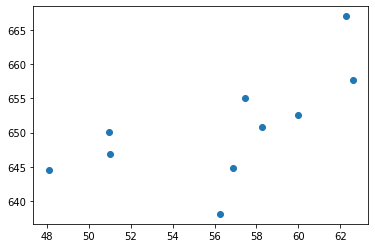

In [11]:
plt.scatter(testdf.age, testdf.credit_score)